In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_vk = pd.read_csv('/content/drive/MyDrive/case_dataset.csv')
df_ok = pd.read_csv('/content/drive/MyDrive/Кейс-чемпионат Данные ОК upd.csv')

# Подготовка данных

## Добавление возрастных групп

Функция деления на возрастные группы (разбиение на одинаковое количество пользователей)




In [ ]:
def add_age_cluster(df, num_groups=10):
    # Выполняем разбиение по квантилям
    age_bins = pd.qcut(df['age'], q=num_groups, duplicates='drop')

    # Преобразуем интервалы в строковый формат
    age_ranges = [f'{int(interval.left)}-{int(interval.right)}' for interval in age_bins.cat.categories]

    # Создаем словарь для замены
    range_labels = {interval: age_range for interval, age_range in zip(age_bins.cat.categories, age_ranges)}

    # Добавляем столбец с диапазонами возрастов
    df['age_cluster'] = age_bins.map(range_labels)

Функция деления на возрастные группы (строгое разбиение по людей по группам в диапазне 4 лет)

In [ ]:
def add_age_group(df):
  df['age'] = df['age'].round()
  intervals = [7, 14, 18, 25, 35, 45, 55, 65, 200]
  intervals_fives = [i for i in range(7, 100, 5)]
  intervals_fives.append(200)
  df["age_group"] = pd.cut(df['age'], bins = intervals_fives, include_lowest= True)
  # Преобразуем интервалы в строковый формат "17-25"
  df['age_group'] = df['age_group'].astype(str)

  # Убираем квадратные скобки и знаки (включая или не включая)
  df['age_group'] = df['age_group'].str.replace(r'[\[\]]', '', regex=True)  # Убираем квадратные скобки
  df['age_group'] = df['age_group'].str.replace(r'\(', '', regex=True)  # Убираем (
  df['age_group'] = df['age_group'].str.replace(r'\)', '', regex=True)  # Убираем )

  df['age_group'] = df['age_group'].str.replace('.0', '').str.replace(',', '-')
  age_order_list = df['age_group'].unique()
  age_dict = {i: band for i, band in enumerate(age_order_list)}

## ВК

In [ ]:
df_vk_days_in_games_above_zero = df_vk[df_vk['days_in_games'] > 0]

In [ ]:
add_age_group(df_vk)
add_age_cluster(df_vk)

In [ ]:
df_vk.head()

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array,age_group,age_cluster
0,0,1,34,2,53,android,"['web2', 'android', 'mvk', 'android_messenger'...",18,13240.403333,17,...,0,NaN,0.0,1.8209,14.099880,{},15,"['18+','Знакомства','Неоригинальный тематическ...",32- 37,32-36
1,1,145,29,1,6743,android,['android'],2,2.460000,1,...,0,NaN,0.0,0.0000,0.000000,{},0,"['Мода','Неоригинальный тематический контент',...",27- 32,28-32
2,2,1,15,2,61,web2,"['web2', 'android']",30,1096.586000,25,...,0,NaN,0.0,0.0000,0.371308,{},6,"['Некачественный контент','Неоригинальный конт...",12- 17,13-17
3,3,1,34,2,0,mvk,['mvk'],2,235.545000,1,...,0,NaN,0.0,0.0000,0.098684,{},12,[],32- 37,32-36
4,4,1,25,2,65,mvk,"['web2', 'mvk']",7,276.398571,4,...,0,NaN,0.0,0.0000,0.115412,{},22,"['Музыка','Неоригинальный тематический контент...",22- 27,24-28


In [ ]:
df_vk['days_in_clips']

In [ ]:
df_vk['days_in_clips'].isnull().count()

1020898

In [ ]:
(df_vk['days_in_clips'] == 0).sum()

367004

In [ ]:
dfdf = df_vk[df_vk['days_in_clips'] == 0]

In [ ]:
dfdf

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array
1,1,145,29,1,6743,android,['android'],2,2.460000,1,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},0,"['Мода','Неоригинальный тематический контент',..."
3,3,1,34,2,0,mvk,['mvk'],2,235.545000,1,...,0,NaN,0,NaN,0.0,0.0,0.098684,{},12,[]
4,4,1,25,2,65,mvk,"['web2', 'mvk']",7,276.398571,4,...,3,68.880000,0,NaN,0.0,0.0,0.115412,{},22,"['Музыка','Неоригинальный тематический контент..."
6,6,1,35,1,0,iphone,"['iphone_messenger', 'iphone']",6,9.430000,2,...,1,6.150000,0,NaN,0.0,0.0,0.000000,{},13,"['Неоригинальный контент','Непрофессиональный ..."
9,9,3,117,2,4,android,"['mvk', 'android']",8,265.218750,7,...,7,172.727143,0,NaN,0.0,0.0,0.013942,{},0,"['Спорт','Неоригинальный тематический контент'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020891,1084527,1,16,2,13,mvk,"['web2', 'mvk']",3,68.880000,2,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},0,"['Музыка','Новости','Знаменитости','Неоригинал..."
1020893,1084529,145,23,2,0,web2,"['web2', 'mvk']",8,1.845000,0,...,1,1.230000,0,NaN,0.0,0.0,0.000000,{},0,[]
1020894,1084530,4,14,2,0,iphone,['iphone'],5,211.068000,3,...,3,38.130000,0,NaN,0.0,0.0,0.084717,{},0,"['Новости','Знаменитости','Неоригинальный конт..."
1020895,1084531,1,15,2,139,android,"['web2', 'android', 'mvk', 'android_messenger']",30,817.909000,19,...,19,138.990000,0,NaN,0.0,0.0,1.814223,{},8,"['Неоригинальный тематический контент','Легков..."


In [ ]:
dfdfdf = df_vk[df_vk['days_in_feed'] == 'NaN']

In [ ]:
df_vk[df_vk['avg_daily_ts_messages'] == 0]

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array
291086,309502,65,26,2,0,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,[]
396132,421297,1,33,2,173,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},8,"['Сообщество про конкретный регион','Некачеств..."
400923,426394,1,18,2,540,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,"['Неоригинальный тематический контент','Игры']"
550664,585609,1,31,2,0,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,"['Непрофессиональный юмор','Юмор']"
631166,671085,1,116,2,17,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,122.968981,{},0,"['Новости','Услуги','Бизнес','Сообщество про к..."
643753,684476,1,22,1,18,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,"['Знакомства','Неоригинальный тематический кон..."
675048,717846,1,23,2,77,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,[]
789866,839652,49,26,1,0,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,[]
901848,958358,1,37,2,6,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,"['Развлечения','Новости','Неоригинальный темат..."
997308,1059527,1,32,2,626,dating_iphone_client,['dating_iphone_client'],0,0.0,0,...,0,0.0,0,0.0,0.0,0.0,0.000000,{},0,"['Новости','Бизнес','Сообщество про конкретный..."


In [ ]:
df_vk[df_vk['avg_daily_ts_messages'].isnull() == True]

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array
1,1,145,29,1,6743,android,['android'],2,2.460000,1,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},0,"['Мода','Неоригинальный тематический контент',..."
3,3,1,34,2,0,mvk,['mvk'],2,235.545000,1,...,0,NaN,0,NaN,0.0,0.0,0.098684,{},12,[]
14,14,1,24,2,0,vk_video_android,"['web2', 'android', 'vk_video_android']",15,7004.522000,1,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},6,"['Полезные советы','Интернет-шоу','Официальные..."
15,15,1,33,1,0,android,['android'],30,2.214000,30,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},0,"['Неоригинальный тематический контент','Неориг..."
17,17,1,55,2,28,web2,['web2'],1,2.460000,1,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},0,"['Азартное','Услуги','Бизнес','Товары','Арт']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020875,1084510,1,21,1,6,android,['android'],2,14.760000,2,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},13,"['Неоригинальный контент','Игры','Оригинальный..."
1020880,1084515,1,36,2,2,android,['android'],1,121.770000,1,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},3,"['Крупные инфлюенсеры','Знаменитости','Музыка'..."
1020886,1084521,3,37,1,38,android,['android'],5,47.724000,4,...,0,NaN,0,NaN,0.0,0.0,0.056451,{},0,"['Книги','Социальные','Текстовые посты']"
1020891,1084527,1,16,2,13,mvk,"['web2', 'mvk']",3,68.880000,2,...,0,NaN,0,NaN,0.0,0.0,0.000000,{},0,"['Музыка','Новости','Знаменитости','Неоригинал..."


In [ ]:
dfdfdf

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array


In [ ]:
df_vk.describe()

,Unnamed: 0,country_id,age,sex,friends,days_in_vk,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,...,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,final_cluster
count,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06,934251.000000,1.020898e+06,...,1.020898e+06,775201.000000,1.020898e+06,868431.000000,1.020898e+06,56262.000000,1.020898e+06,1.020898e+06,1.020898e+06,1.020898e+06
mean,5.426444e+05,1.110879e+01,3.103372e+01,1.475691e+00,1.492424e+02,1.900231e+01,2.465287e+03,1.649066e+01,824.902671,7.030948e+00,...,7.282587e+00,1080.990825,1.228411e+01,389.946668,3.049648e-01,1124.346348,2.363958e-01,5.220557e-02,4.659834e+00,8.167330e+00
std,3.131579e+05,3.871220e+01,1.736320e+01,5.002438e-01,4.657268e+02,1.101728e+01,3.670053e+03,1.181452e+01,1317.074512,9.130400e+00,...,8.308504e+00,2622.306000,1.131563e+01,1073.695139,2.382813e+00,2747.938094,1.724557e+01,1.095166e+00,1.911437e+01,7.434304e+00
min,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.714072e+05,1.000000e+00,1.800000e+01,1.000000e+00,4.000000e+00,8.000000e+00,2.691650e+02,4.000000e+00,59.040000,0.000000e+00,...,1.000000e+00,37.310000,1.000000e+00,28.167000,0.000000e+00,9.840000,0.000000e+00,0.000000e+00,1.146732e-02,0.000000e+00
50%,5.428815e+05,1.000000e+00,2.800000e+01,1.000000e+00,5.100000e+01,2.300000e+01,1.069975e+03,1.800000e+01,282.900000,2.000000e+00,...,4.000000e+00,167.192143,8.000000e+00,93.357000,0.000000e+00,88.560000,0.000000e+00,0.000000e+00,8.622609e-01,7.000000e+00
75%,8.140248e+05,1.000000e+00,3.900000e+01,2.000000e+00,1.480000e+02,3.000000e+01,3.191799e+03,2.900000e+01,1044.743077,1.200000e+01,...,1.200000e+01,824.100000,2.400000e+01,296.635000,0.000000e+00,927.420000,0.000000e+00,0.000000e+00,5.498382e+00,1.300000e+01
max,1.084533e+06,2.320000e+02,1.190000e+02,2.000000e+00,1.000000e+04,3.000000e+01,1.026687e+05,3.000000e+01,40278.728000,3.000000e+01,...,3.000000e+01,146057.580000,3.000000e+01,60114.446000,3.000000e+01,57211.482000,8.658889e+03,2.550108e+02,8.392882e+03,2.500000e+01


## ОК

In [ ]:
df_ok_days_in_games_above_zero = df_ok[df_ok['days_in_games'] > 0]

In [ ]:
add_age_group(df_ok)
add_age_cluster(df_ok)

In [ ]:
df_ok.head()

,age,sex,friends,heavy_ok_platform,ok_platforms_array,days_in_ok,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,...,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_ok,games,age_group,age_cluster
0,60.0,1,NaN,DESKTOP_WEB,"[DESKTOP_WEB, MOBILE_WEB]",6,676.50,1.0,85.36,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57- 62,51-61
1,55.0,1,16.0,DESKTOP_WEB,"[DESKTOP_WEB, MOBILE_WEB]",7,1454.91,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52- 57,51-61
2,10.0,1,NaN,APP_ANDROID,[APP_ANDROID],3,123.00,3.0,31.02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.999- 12,0-15
3,50.0,2,NaN,DESKTOP_WEB,"[APP_ANDROID, DESKTOP_WEB]",1,538.74,1.0,76.34,NaN,...,1.0,54.12,NaN,NaN,NaN,NaN,NaN,NaN,47- 52,43-51
4,26.0,2,NaN,APP_ANDROID,[APP_ANDROID],1,3590.37,1.0,103.25,NaN,...,2.0,1414.50,NaN,NaN,NaN,NaN,NaN,NaN,22- 27,23-28


In [ ]:
df_ok.describe()

,age,sex,friends,days_in_ok,avg_daily_ts,days_in_feed,avg_daily_ts_feed,days_in_clips,avg_daily_ts_clips,days_in_video,avg_daily_ts_video,days_in_messages,avg_daily_ts_messages,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_ok
count,445744.000000,448216.000000,271425.000000,448216.000000,448216.000000,279616.000000,279616.000000,6588.000000,6588.000000,92148.000000,91771.000000,65722.000000,65722.000000,28241.000000,28241.000000,15615.000000,15615.000000,15615.000000
mean,35.389028,1.553617,77.639407,4.369121,1352.534539,4.132278,242.041984,2.219794,601.402969,3.364056,1985.464301,5.469706,341.724621,16.908289,6427.466718,125.337429,2.289499,5848.340154
std,18.750100,0.497117,224.990744,6.750043,4330.331876,6.764078,752.105322,2.601623,1189.413742,4.683799,6480.349602,6.998638,1709.431680,12.555216,8694.893019,369.329320,5.219082,12844.223562
min,1.000000,1.000000,1.000000,1.000000,1.230000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.080000,0.000000,0.840000
25%,20.000000,1.000000,4.000000,1.000000,73.800000,1.000000,11.630000,1.000000,25.830000,1.000000,28.290000,1.000000,29.520000,2.000000,303.810000,8.120000,0.060000,673.165000
50%,32.000000,2.000000,21.000000,2.000000,231.240000,1.000000,35.680000,1.000000,150.575000,1.000000,141.450000,2.000000,78.720000,22.000000,3357.340000,31.680000,0.370000,2174.700000
75%,47.000000,2.000000,80.000000,4.000000,755.220000,3.000000,149.217500,2.000000,686.392500,3.000000,1485.840000,6.000000,225.797500,30.000000,9240.460000,105.085000,2.100000,6017.985000
max,119.000000,2.000000,6002.000000,30.000000,570105.000000,30.000000,37023.520000,29.000000,24887.640000,30.000000,421844.920000,30.000000,281819.550000,30.000000,128797.280000,13133.380000,147.550000,379444.780000


## Замена на ноль (вроде не нужна)

In [ ]:
null_counts = df_vk.isnull().sum()
print(null_counts)

Unnamed: 0                    0
country_id                    0
age                           0
sex                           0
friends                       0
heavy_vk_platform             0
vk_platforms_array            0
days_in_vk                    0
avg_daily_ts                  0
days_in_feed                  0
avg_daily_ts_feed         86647
days_in_clips                 0
avg_daily_ts_clips       366993
days_in_video                 0
avg_daily_ts_video       245697
days_in_messages              0
avg_daily_ts_messages    152467
days_in_games                 0
avg_daily_ts_games       964636
games_revenue_in_app          0
games_revenue_ads             0
total_revenue_vk              0
games                         0
final_cluster                 0
interest_array                0
dtype: int64


In [ ]:
null_counts = df_ok.isnull().sum()
print(null_counts)

age                         798
sex                           0
friends                   29247
heavy_ok_platform             0
ok_platforms_array            0
days_in_ok                    0
avg_daily_ts                  0
days_in_feed              29988
avg_daily_ts_feed         29988
days_in_clips            381298
avg_daily_ts_clips       381298
days_in_video            199901
avg_daily_ts_video       200027
days_in_messages         227842
avg_daily_ts_messages    227842
days_in_games            394917
avg_daily_ts_games       394917
games_revenue_in_app     445598
games_revenue_ads        416719
total_revenue_ok          67815
games                    394917
dtype: int64


In [ ]:
zero_counts = (df_vk == 0).sum()
print(zero_counts)

Unnamed: 0                     1
country_id                   864
age                            0
sex                          426
friends                   182763
heavy_vk_platform              0
vk_platforms_array             0
days_in_vk                    11
avg_daily_ts                  11
days_in_feed               86658
avg_daily_ts_feed             11
days_in_clips             367004
avg_daily_ts_clips            11
days_in_video             245708
avg_daily_ts_video            11
days_in_messages          152478
avg_daily_ts_messages         11
days_in_games             964647
avg_daily_ts_games            11
games_revenue_in_app     1019139
games_revenue_ads         966296
total_revenue_vk          223990
games                          0
final_cluster             265621
interest_array                 0
dtype: int64


In [ ]:
zero_counts = (df_ok == 0).sum()
print(zero_counts)

age                          0
sex                          0
friends                      0
heavy_ok_platform            0
ok_platforms_array           0
days_in_ok                   0
avg_daily_ts                 0
days_in_feed                 0
avg_daily_ts_feed          269
days_in_clips                0
avg_daily_ts_clips        3000
days_in_video                0
avg_daily_ts_video        8529
days_in_messages             0
avg_daily_ts_messages       78
days_in_games                0
avg_daily_ts_games        2950
games_revenue_in_app         0
games_revenue_ads         2673
total_revenue_ok         20194
games                        0
dtype: int64


In [ ]:
nan_rows = df_vk[df_vk['avg_daily_ts_clips'].isnull()]
# print("Строки с NaN значениями в столбце avg_daily_ts_clips:")
# print(nan_rows)

# Строки с нулями в столбце avg_daily_ts_clips
zero_rows = df_vk[df_vk['avg_daily_ts_clips'] == 0]
# print("\nСтроки с нулями в столбце avg_daily_ts_clips:")
# print(zero_rows)

In [ ]:
columns_to_display = ['country_id', 'age', 'sex', 'friends', 'heavy_vk_platform', 'vk_platforms_array', 'days_in_vk', 'days_in_feed', 'avg_daily_ts_clips']

# Строки с NaN
nan_rows = df_vk[df_vk['avg_daily_ts_clips'].isnull()]
# print("Строки с NaN значениями в столбце avg_daily_ts_clips (выбранные столбцы):")
# print(nan_rows[columns_to_display])

# Строки с нулями
zero_rows = df_vk[df_vk['avg_daily_ts_clips'] == 0]
# print("\nСтроки с нулями в столбце avg_daily_ts_clips (выбранные столбцы):")
# print(zero_rows[columns_to_display])

In [ ]:
nan_rows[columns_to_display]

,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,days_in_feed,avg_daily_ts_clips
1,145,29,1,6743,android,['android'],2,1,NaN
3,1,34,2,0,mvk,['mvk'],2,1,NaN
4,1,25,2,65,mvk,"['web2', 'mvk']",7,4,NaN
6,1,35,1,0,iphone,"['iphone_messenger', 'iphone']",6,2,NaN
9,3,117,2,4,android,"['mvk', 'android']",8,7,NaN
...,...,...,...,...,...,...,...,...,...
1020891,1,16,2,13,mvk,"['web2', 'mvk']",3,2,NaN
1020893,145,23,2,0,web2,"['web2', 'mvk']",8,0,NaN
1020894,4,14,2,0,iphone,['iphone'],5,3,NaN
1020895,1,15,2,139,android,"['web2', 'android', 'mvk', 'android_messenger']",30,19,NaN


In [ ]:
zero_rows[columns_to_display]

,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,days_in_feed,avg_daily_ts_clips
291086,65,26,2,0,dating_iphone_client,['dating_iphone_client'],0,0,0.0
396132,1,33,2,173,dating_iphone_client,['dating_iphone_client'],0,0,0.0
400923,1,18,2,540,dating_iphone_client,['dating_iphone_client'],0,0,0.0
550664,1,31,2,0,dating_iphone_client,['dating_iphone_client'],0,0,0.0
631166,1,116,2,17,dating_iphone_client,['dating_iphone_client'],0,0,0.0
643753,1,22,1,18,dating_iphone_client,['dating_iphone_client'],0,0,0.0
675048,1,23,2,77,dating_iphone_client,['dating_iphone_client'],0,0,0.0
789866,49,26,1,0,dating_iphone_client,['dating_iphone_client'],0,0,0.0
901848,1,37,2,6,dating_iphone_client,['dating_iphone_client'],0,0,0.0
997308,1,32,2,626,dating_iphone_client,['dating_iphone_client'],0,0,0.0


In [ ]:
zero_rows = df_vk[df_vk.eq(0).any(axis=1)]

In [ ]:
zero_rows

,Unnamed: 0,country_id,age,sex,friends,heavy_vk_platform,vk_platforms_array,days_in_vk,avg_daily_ts,days_in_feed,...,days_in_games,avg_daily_ts_games,games_revenue_in_app,games_revenue_ads,total_revenue_vk,games,final_cluster,interest_array,age_group,age_cluster
0,0,1,34,2,53,android,"['web2', 'android', 'mvk', 'android_messenger'...",18,13240.403333,17,...,0,NaN,0.0,1.8209,14.099880,{},15,"['18+','Знакомства','Неоригинальный тематическ...",32- 37,32-36
1,1,145,29,1,6743,android,['android'],2,2.460000,1,...,0,NaN,0.0,0.0000,0.000000,{},0,"['Мода','Неоригинальный тематический контент',...",27- 32,28-32
2,2,1,15,2,61,web2,"['web2', 'android']",30,1096.586000,25,...,0,NaN,0.0,0.0000,0.371308,{},6,"['Некачественный контент','Неоригинальный конт...",12- 17,13-17
3,3,1,34,2,0,mvk,['mvk'],2,235.545000,1,...,0,NaN,0.0,0.0000,0.098684,{},12,[],32- 37,32-36
4,4,1,25,2,65,mvk,"['web2', 'mvk']",7,276.398571,4,...,0,NaN,0.0,0.0000,0.115412,{},22,"['Музыка','Неоригинальный тематический контент...",22- 27,24-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020893,1084529,145,23,2,0,web2,"['web2', 'mvk']",8,1.845000,0,...,0,NaN,0.0,0.0000,0.000000,{},0,[],22- 27,19-24
1020894,1084530,4,14,2,0,iphone,['iphone'],5,211.068000,3,...,0,NaN,0.0,0.0000,0.084717,{},0,"['Новости','Знаменитости','Неоригинальный конт...",12- 17,13-17
1020895,1084531,1,15,2,139,android,"['web2', 'android', 'mvk', 'android_messenger']",30,817.909000,19,...,0,NaN,0.0,0.0000,1.814223,{},8,"['Неоригинальный тематический контент','Легков...",12- 17,13-17
1020896,1084532,1,45,2,12,vk_video_ios,"['iphone', 'vk_video_ios']",9,3043.156667,2,...,0,NaN,0.0,0.0000,0.000000,{},3,"['Новости','Кино','Оригинальный контент']",42- 47,42-52


In [ ]:
# Замените все null значения на 0
df_vk = df_vk.fillna(0)

print("DataFrame после замены всех null значений на 0:")

TypeError: Cannot setitem on a Categorical with a new category (0), set the categories first

In [ ]:
null_counts = df_vk.isnull().sum()

print(null_counts)

In [ ]:
df_ok_days_in_games_above_zero = df_ok[df_ok['days_in_games'] > 0]

In [ ]:
df_ok.head()

# Контент

In [ ]:
def make_df_days_in_games_above_zero(df):


SyntaxError: incomplete input (<ipython-input-97-9365878ba487>, line 1)

## Распределение возрастов

In [ ]:
def plot_age_distribution(df):
  # Постройте гистограмму распределения возраста
  plt.figure(figsize=(10, 6))
  sns.histplot(df['age'], bins=60, kde=True)  # kde=True добавляет кривую плотности

  # Настройки графика
  plt.title('Распределение по возрасту')
  plt.xlabel('Возраст')
  plt.ylabel('Количество')

  # Покажите график
  plt.show()

In [ ]:
plot_age_distribution(df_vk)
plot_age_distribution(df_ok)

## Распределение платформ по количеству людей

In [ ]:
def plot_platform_every_user(df):
    # Считаем количество уникальных значений в столбце 'heavy_ok_platform'
    most_used_platform = df['heavy_ok_platform'].value_counts()

    # Получаем список платформ в порядке убывания частоты
    sorted_platforms = most_used_platform.index.tolist()

    # Создаем график с сортировкой
    plt.figure(figsize=(10, 6))  # Увеличиваем размер графика для удобства
    most_user_platform_plot = sns.countplot(data=df, x='heavy_ok_platform', order=sorted_platforms)

    # Вращаем подписи на осях для удобного отображения
    plt.xticks(rotation=90)
    plt.title("Usage Frequency of Platforms")
    plt.xlabel("Platform")
    plt.ylabel("Frequency")

    # Отображаем график
    plt.show()

In [ ]:
def plot_platform_gaming_user(df):
  # Считаем количество значений и сортируем по убыванию
  sorted_categories = df['heavy_ok_platform'].value_counts().index

  # Преобразуем столбец 'heavy_vk_platform' в категориальный тип с заданным порядком
  df['heavy_ok_platform'] = pd.Categorical(df['heavy_ok_platform'], categories=sorted_categories, ordered=True)

  # Построение графика с отсортированными категориями и коричневым цветом
  plt.figure(figsize=(10, 6))
  most_user_platform_plot = sns.histplot(df, bins=20, x='heavy_ok_platform', color='brown')
  plt.xticks(rotation=90)
  plt.title("Платформы, отсортированные по убыванию частоты")
  plt.xlabel("Платформа")
  plt.ylabel("Частота")
  plt.show()

  # # Считаем количество значений и сортируем по убыванию для отфильтрованного DataFrame
  # df_filtered_counts = df_filtered['heavy_ok_platform'].value_counts().reset_index()
  # df_filtered_counts.columns = ['Platform', 'Frequency']  # Переименовываем столбцы

  # # Экспортируем данные в CSV
  # df_filtered_counts.to_csv('/content/filtered_data_for_canva.csv', index=False)

  # # Скачиваем CSV файл
  # from google.colab import files
  # files.download('/content/filtered_data_for_canva.csv')

In [ ]:
def plot_platform_every_user_and_gaming(df):
  # Сортируем данные по убыванию для исходного DataFrame
  df_sorted = df['heavy_ok_platform'].value_counts().sort_values(ascending=False).index
  df['heavy_ok_platform'] = pd.Categorical(df['heavy_ok_platform'], categories=df_sorted, ordered=True)

  # Сортируем данные по убыванию для отфильтрованного DataFrame
  df_sorted = df['heavy_ok_platform'].value_counts().sort_values(ascending=False).index
  df['heavy_ok_platform'] = pd.Categorical(df['heavy_ok_platform'], categories=df_sorted, ordered=True)

  plt.figure(figsize=(10, 6))

  # Построение гистограммы для исходного DataFrame
  sns_hist_original = sns.histplot(df, bins=20, x='heavy_ok_platform', color='blue', alpha=0.5, label='Original Data')

  # Построение гистограммы для отфильтрованного DataFrame поверх предыдущей
  sns_hist_filtered = sns.histplot(df, bins=20, x='heavy_ok_platform', color='orange', alpha=0.5, label='Filtered Data')

  # Получаем значения частоты каждого столбика для добавления пиков
  for container in sns_hist_original.patches:
      height = container.get_height()
      if height > 0:  # Только если столбик имеет ненулевую высоту
          plt.text(container.get_x() + container.get_width() / 2, height, int(height),
                  ha='center', va='bottom', fontsize=10, color='black')

  for container in sns_hist_filtered.patches:
      height = container.get_height()
      if height > 0:  # Только если столбик имеет ненулевую высоту
          plt.text(container.get_x() + container.get_width() / 2, height, int(height),
                  ha='center', va='bottom', fontsize=10, color='black')

  # Добавление легенды и заголовков
  plt.legend()
  plt.title("Сравнение платформ (исходные и отфильтрованные данные), отсортировано по убыванию")
  plt.xlabel("Платформа")
  plt.ylabel("Частота")
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

In [ ]:
plot_platform_every_user(df_ok)
plot_platform_gaming_user(df_ok)
plot_platform_every_user_and_gaming(df_ok)

In [ ]:
# Разверните списки в столбце 'vk_platforms_array' в отдельные строки
# df_exploded = df.explode('vk_platforms_array')

# Отфильтруйте строки, где значения в столбце 'count' больше 0
df_ok_platforms_array = df_ok[df_ok['days_in_games'] > 0]

# Посчитайте количество упоминаний каждой платформы среди отфильтрованных данных
platform_counts = df_ok_platforms_array['ok_platforms_array'].value_counts()

# Постройте график
plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Частота использования каждой платформы (count > 0)')
plt.xlabel('Платформа')
plt.ylabel('Количество упоминаний')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Предполагаем, что у нас есть датафрейм `df` с колонкой 'days_in_games'
# Если нужно загрузить данные из файла:
# df = pd.read_csv('ваш_файл.csv')

# Фильтрация данных (например, убираем нулевые значения, если нужно)
df_filtered = df_ok[df_ok['days_in_games'] > 0]

# Расчёт процента удержания на 1, 7 и 30 день
total_users = len(df_filtered)
retention_1_day = (df_filtered['days_in_games'] >= 1).sum() / total_users * 100
retention_7_days = (df_filtered['days_in_games'] >= 7).sum() / total_users * 100
retention_30_days = (df_filtered['days_in_games'] >= 30).sum() / total_users * 100

# Данные для графика
retention_data = [retention_1_day, retention_7_days, retention_30_days]
days_labels = ['1-день', '7-день', '30-день']

# Построение графика
plt.figure(figsize=(10, 8))
plt.bar(days_labels, retention_data, color='skyblue')
plt.xlabel('День')
plt.ylabel('Процент удержания (%)')
plt.title('Retention (Удержание пользователей) на 1, 7 и 30 день')

# Установка шкалы на оси Y с шагом 5
plt.yticks(range(0, 101, 5))  # от 0 до 100 с шагом 5

plt.show()

In [ ]:
total_users = len(df_ok)
retention_1_day = (df_filtered['days_in_games'] >= 1).sum() / total_users * 100
retention_7_days = (df_filtered['days_in_games'] >= 7).sum() / total_users * 100
retention_30_days = (df_filtered['days_in_games'] >= 30).sum() / total_users * 100

# Данные для графика
retention_data = [retention_1_day, retention_7_days, retention_30_days]
days_labels = ['1-день', '7-день', '30-день']

# Построение графика
plt.figure(figsize=(10, 8))
plt.bar(days_labels, retention_data, color='skyblue')
plt.xlabel('День')
plt.ylabel('Процент удержания (%)')
plt.title('Retention (Удержание пользователей) на 1, 7 и 30 день')
plt.show()

# Удеражание по возрастным группам

In [ ]:
def keeping_alive_by_age_band(df):
  case_qcut_gamers = df[df['days_in_games' ]>= 1]
  age_bands = case_qcut_gamers['age_cluster'].unique()
  total_users = len(df_filtered)

  # Создаем пустой DataFrame для хранения данных удержания
  retention_results = pd.DataFrame(index=range(1, 31), columns=age_bands)

  # Расчет процента удержания для каждого дня от 1 до 30 и для каждого Age_band
  for age_band in age_bands:
      # Фильтрация по возрастному диапазону
      filtered_age_band = case_qcut_gamers[case_qcut_gamers['age_cluster'] == age_band]
      users_age_band = len(filtered_age_band)
      for day in range(1, 31):
          retention_results.loc[day, age_band] = (filtered_age_band['days_in_games'] >= day).sum() / users_age_band * 100

  # Построение графика
  plt.figure(figsize=(12, 6))
  colors = plt.cm.Paired(range(len(age_bands)))

  # Обход каждой строки в retention_results для построения графиков по age_band
  for idx, age_band in enumerate(age_bands):
      plt.plot(retention_results.index, retention_results[age_band], marker='o', color=colors[idx], linestyle='-', linewidth=2, markersize=6, label=age_band)

  # Настройки графика
  plt.xlabel('День')
  plt.ylabel('Процент удержания (%)')
  plt.title('Retention (Удержание пользователей) на каждый день от 1 до 30')
  plt.xticks(retention_results.index)
  plt.yticks(range(0, 101, 5))  # Установка шкалы на оси Y с шагом 5
  plt.grid(visible=True, linestyle='--', alpha=0.7)  # Добавить сетку для удобства просмотра
  plt.legend(title='Age Band')  # Легенда для разных возрастных групп
  plt.show()

<ipython-input-99-00910d5e1be5>:15: RuntimeWarning: invalid value encountered in scalar divide
  retention_results.loc[day, age_band] = (filtered_age_band['days_in_games'] >= day).sum() / users_age_band * 100


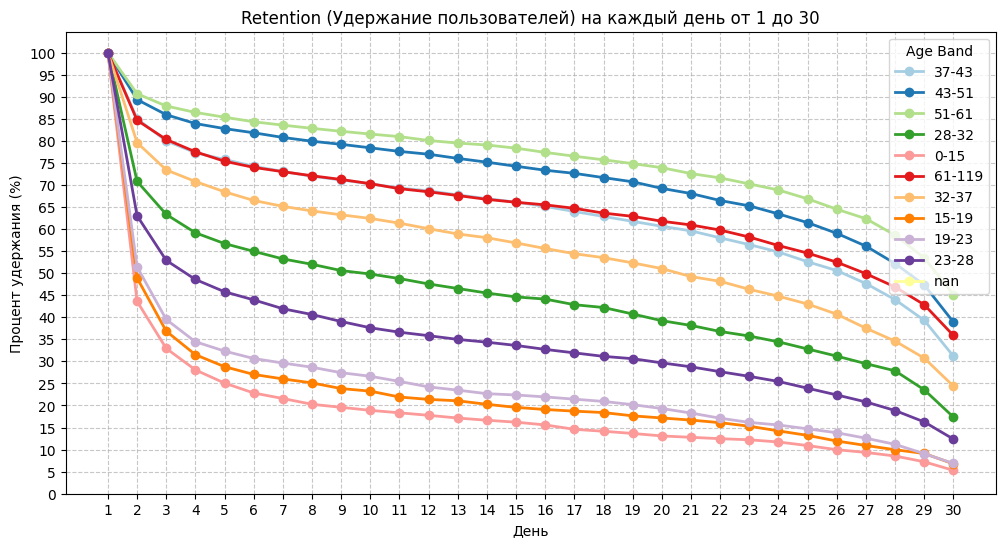

In [ ]:
keeping_alive_by_age_band(df_ok)

In [ ]:
df_ok['age_group'].unique()

array(['57- 62', '52- 57', '6.999- 12', '47- 52', '22- 27', '17- 22',
       '97- 200', '32- 37', '42- 47', '62- 67', '77- 82', '67- 72',
       '12- 17', '27- 32', 'nan', '37- 42', '92- 97', '82- 87', '87- 92',
       '72- 77'], dtype=object)

In [ ]:
for item in df_ok['age_cluster'].unique():
  print(item)

51-61
0-15
43-51
23-28
15-19
61-119
32-37
37-43
19-23
28-32
nan


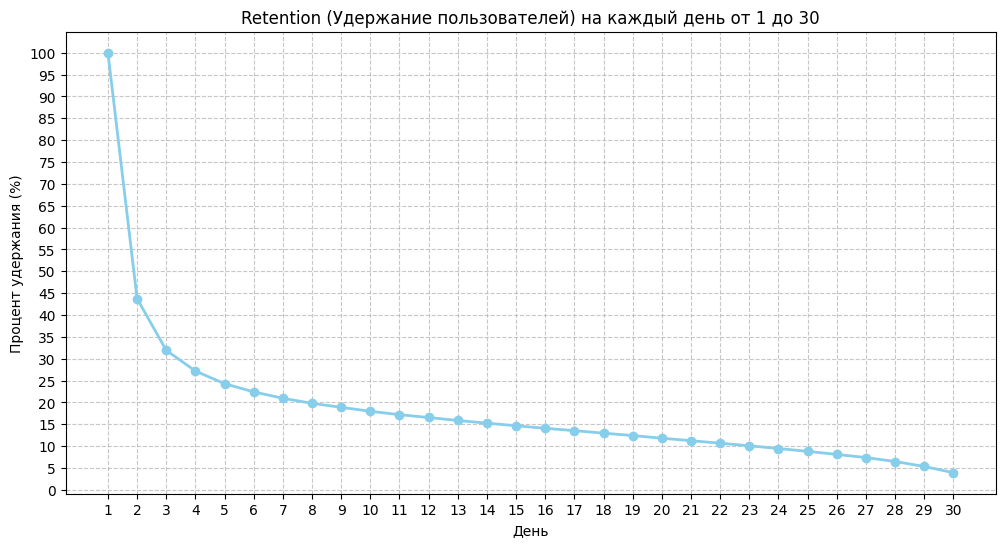

In [ ]:
# Предполагаем, что у нас есть датафрейм `df` с колонкой 'days_in_games'
# Если нужно загрузить данные из файла:
# df = pd.read_csv('ваш_файл.csv')

# Фильтрация данных (например, убираем нулевые значения, если нужно)
df_filtered = df[df['days_in_games'] > 0]


# Расчёт процента удержания для каждого дня от 1 до 30
total_users = len(df_filtered)
retention_data = [(df_filtered['days_in_games'] >= day).sum() / total_users * 100 for day in range(1, 31)]
days_labels = list(range(1, 31))

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(days_labels, retention_data, marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=6)
plt.xlabel('День')
plt.ylabel('Процент удержания (%)')
plt.title('Retention (Удержание пользователей) на каждый день от 1 до 30')
plt.xticks(days_labels)  # Показать метки для всех дней от 1 до 30
plt.yticks(range(0, 101, 5))  # Установка шкалы на оси Y с шагом 5

plt.grid(visible=True, linestyle='--', alpha=0.7)  # Добавить сетку для удобства просмотра
plt.show()

In [ ]:
games_revenue_in_app = df['games_revenue_in_app'].sum()
games_revenue_ads = df['games_revenue_ads'].sum()
total_revenue_vk = df['total_revenue_vk'].sum()

# Рассчёт процентных долей
in_app_percentage = (games_revenue_in_app / total_revenue_vk) * 100
ads_percentage = (games_revenue_ads / total_revenue_vk) * 100

# Данные для графика
revenue_data = [in_app_percentage, ads_percentage]
labels = ['In-App Revenue', 'Ads Revenue']

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(labels, revenue_data, color=['blue', 'orange'])
plt.xlabel('Источник выручки')
plt.ylabel('Процент от общей выручки (%)')
plt.title('Распределение нерекламной и рекламной выручки от общей выручки')
plt.yticks(range(0, 101, 10))  # Шкала с шагом 10

plt.show()

In [ ]:
# Замените 'file.csv' на путь к вашему файлу
df2 = pd.read_csv('/content/drive/MyDrive/dictionary_games_category.csv')

# Посмотреть первые 5 строк данных
df2.head()

In [ ]:
df_games = pd.DataFrame(df['games'])
df_genres = pd.DataFrame(df2[['game_id', 'game_category']])

In [ ]:
df_games

In [ ]:
import ast

In [ ]:
# Фильтруем строки, где строка не равна '{}' (пустой словарь)
df_filtered_games = df_games[df_games['games'].apply(lambda x: x != '{}')]

print(df_filtered_games)

In [ ]:
df_filtered_games['games'] = df_filtered_games['games'].apply(ast.literal_eval)

In [ ]:
df_filtered_games

In [ ]:
df_filtered_games.iterrows()

In [ ]:
games_data = []
for index, row in df_filtered_games.iterrows():
    for game_id, active_days in row['games'].items():
        games_data.append({'game_id': game_id, 'active_days': active_days})

# Преобразование в DataFrame
games_df = pd.DataFrame(games_data)

In [ ]:
games_df

In [ ]:
# Объединение таблиц по "game_id"
games_with_genres = pd.merge(games_df, df_genres, left_on='game_id', right_on='game_id', how='left')


In [ ]:
games_with_genres

In [ ]:
# Отбираем игры с хотя бы одним активным днем
active_games = games_with_genres[games_with_genres['active_days'] > 0]

# Подсчет популярности игр
game_popularity = active_games['game_category'].value_counts()

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(game_popularity.index.astype(str), game_popularity.values, color='skyblue')
plt.xlabel('Жанр игры')
plt.ylabel('Количество пользователей с хотя бы одним активным днем')
plt.title('Распределение популярности игр (1+ активный день)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Суммарные активные дни по жанрам
genre_popularity = active_games.groupby('game_category')['active_days'].sum()

# Сортировка по убыванию
genre_popularity = genre_popularity.sort_values(ascending=False)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(genre_popularity.index, genre_popularity.values, color='orange')
plt.xlabel('Жанр игры')
plt.ylabel('Суммарные активные дни')
plt.title('Распределение популярности жанров по суммарным активным дням')
plt.xticks(rotation=90)
plt.show()

In [ ]:
case_VK

# Распределение жанров

In [ ]:
df_games = pd.DataFrame(case_VK[['games', 'age_group', 'heavy_vk_platform']])
df_genres = pd.DataFrame(df2[['game_id', 'game_category']])

In [ ]:
# Фильтруем строки, где строка не равна '{}' (пустой словарь)
df_filtered_games = df_games[df_games['games'].apply(lambda x: x != '{}')]

In [ ]:
df_filtered_games['games'] = df_filtered_games['games'].apply(ast.literal_eval)

In [ ]:
games_data = []
for index, row in df_filtered_games.iterrows():
    age_group = row['age_group']  # Получаем age_group из строки
    vk_platform = row['heavy_vk_platform']
    for game_id, active_days in row['games'].items():
        games_data.append({'game_id': game_id, 'active_days': active_days, 'age_group': age_group, 'heavy_vk_platform': vk_platform})

# Преобразование в DataFrame
games_df = pd.DataFrame(games_data)

In [ ]:
# Объединение таблиц по "game_id"
games_with_genres = pd.merge(games_df, df_genres, left_on='game_id', right_on='game_id', how='left')

In [ ]:
def plot_genre_popularity(merged_df, age_group = False):
  active_games = games_with_genres[games_with_genres['active_days'] > 0]

  if age_group:
    active_games = active_games[active_games['age_group'] == age_group]

  # Подсчет популярности игр
  game_popularity = active_games['game_category'].value_counts()

  # Построение графика
  plt.figure(figsize=(10, 6))
  plt.bar(game_popularity.index.astype(str), game_popularity.values, color='skyblue')
  plt.xlabel('Жанр игры')
  plt.ylabel('Количество пользователей с хотя бы одним активным днем')
  plt.title('Распределение популярности игр (1+ активный день) для ' + age_group)
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
def plot_genre_popularity(merged_df, age_group = False):
  # Отбираем игры с хотя бы одним активным днем
  active_games = games_with_genres[games_with_genres['active_days'] > 0]

  if age_group:
    active_games = active_games[active_games['age_group'] == age_group]

  # Подсчет популярности игр
  game_popularity = active_games['game_category'].value_counts()

  # Построение круговой диаграммы
  plt.figure(figsize=(10, 10))
  plt.pie(game_popularity, labels=game_popularity.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
  plt.title('Распределение популярности игр (1+ активный день) для' + age_group)
  plt.axis('equal')  # Чтобы диаграмма была круглая
  plt.show()

In [ ]:
unique_age_groups = games_with_genres['age_group'].unique()
unique_age_groups.sort()
for i in unique_age_groups:
  plot_genre_popularity(games_with_genres, i)

In [ ]:
# Получаем уникальные возрастные группы
unique_age_groups = games_with_genres['age_group'].unique()
unique_age_groups.sort()

# Цвета для разных возрастных групп
colors = plt.cm.Paired(range(len(unique_age_groups)))

# Построение графиков на одном
plt.figure(figsize=(12, 8))

# Для каждой возрастной группы строим график с разным цветом
for idx, age_group in enumerate(unique_age_groups):
    # Отбираем данные для текущей возрастной группы
    age_group_data = games_with_genres[games_with_genres['age_group'] == age_group]

    # Подсчитываем популярность жанров для текущей группы
    game_popularity = age_group_data['game_category'].value_counts()

    # Строим столбчатую диаграмму для этой возрастной группы
    plt.bar(game_popularity.index, game_popularity.values, label=age_group, color=colors[idx], alpha=0.6)

# Настройка графика
plt.xlabel('Жанр игры')
plt.ylabel('Количество пользователей')
plt.title('Распределение популярности жанров по возрастным группам')
plt.xticks(rotation=90)

# Добавление легенды
plt.legend(title='Возрастная группа', loc='upper left')

# Показать график
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример данных, создайте данные по образцу, если у вас другой датафрейм
# Подсчет значений для каждого жанра и платформы
genre_platform_counts = games_with_genres.groupby(['game_category', 'heavy_vk_platform']).size().unstack().fillna(0)

# Преобразование количества в проценты
genre_platform_percentage = genre_platform_counts.div(genre_platform_counts.sum(axis=1), axis=0) * 100

# Построение графика
plt.figure(figsize=(14, 8))

# Поочередное построение сегментов для каждой платформы
bottom = np.zeros(len(genre_platform_percentage))
for platform in genre_platform_percentage.columns:
    plt.bar(genre_platform_percentage.index,
            genre_platform_percentage[platform],
            bottom=bottom,
            label=platform)
    bottom += genre_platform_percentage[platform]

# Настройка графика
plt.xlabel("Жанры игр")
plt.ylabel("Процент (%)")
plt.title("Распределение жанров по платформам (в процентах)")
plt.xticks(rotation=45)
plt.yticks(range(0, 101, 10))  # Шкала с шагом 10%
plt.legend(title="Платформы")
plt.tight_layout()

plt.show()


In [ ]:
from google.colab import files

# Сохранение данных в CSV
export_data.to_csv("genre_platform_distribution.csv", index=False)

# Загрузка файла на локальный компьютер
files.download("genre_platform_distribution.csv")


# Доля дохода от рекламы и покупок

## Юлен вариант

процент пользователей, который приносит прибыль в разных сегментах (здесь не должно быть умножения на 100)

In [ ]:
# 3. Конверсия в покупки и рекламу
purchase_conversion = (df['games_revenue_in_app'] > 0).mean() * 100
ad_conversion = (df['games_revenue_ads'] > 0).mean() * 100
conversion_data = {'In-Game Purchases': purchase_conversion, 'Ads Interaction': ad_conversion}
plt.figure(figsize=(8, 5))
plt.bar(conversion_data.keys(), conversion_data.values(), color=['royalblue', 'orange'])
plt.title("Конверсия в покупки и рекламу")
plt.ylabel("Процент (%)")
plt.show()

## Моя версия

количество условных единиц дохода за каждый рекламу и покупки
(среднее считается среди тех, кто принёс хотя бы кусочек прибыли)

In [ ]:
# 3. Конверсия в покупки и рекламу
purchase_conversion = (df['games_revenue_in_app'] > 0).mean()
ad_conversion = (df['games_revenue_ads'] > 0).mean()
conversion_data = {'In-Game Purchases': purchase_conversion, 'Ads Interaction': ad_conversion}
plt.figure(figsize=(8, 5))
plt.bar(conversion_data.keys(), conversion_data.values(), color=['royalblue', 'orange'])
plt.title("Конверсия в покупки и рекламу")
plt.ylabel("Условные единицы")
plt.show()

количество условных единиц дохода за каждый рекламу и покупки (среднее считается от всех)

In [ ]:
def plot_money_graph(age_group = ''):
  function_df = df

  if age_group:
      function_df = case_VK[case_VK['age_group'] == age_group]
      age_group = 'для ' + age_group

  # 3. Конверсия в покупки и рекламу
  purchase_conversion = (function_df['games_revenue_in_app']).mean()
  ad_conversion = (function_df['games_revenue_ads']).mean()
  conversion_data = {'In-Game Purchases': purchase_conversion, 'Ads Interaction': ad_conversion}
  plt.figure(figsize=(8, 5))
  plt.bar(conversion_data.keys(), conversion_data.values(), color=['royalblue', 'orange'])
  plt.ylabel("Условные единицы")
  plt.title('Средняя рекламная и нерекламная выручка' + age_group)
  plt.show()

процент прибыли, которую приносят игры от общей выручки вк

In [ ]:
def plot_money_graph_proportion(age_group = ''):
  function_df = df

  if age_group:
      function_df = case_VK[case_VK['age_group'] == age_group]
      age_group = ' для ' + age_group

  games_revenue_in_app = function_df['games_revenue_in_app'].sum()
  games_revenue_ads = function_df['games_revenue_ads'].sum()
  total_revenue_vk = df['total_revenue_vk'].sum()

  # Рассчёт процентных долей
  in_app_percentage = (games_revenue_in_app / total_revenue_vk) * 100
  ads_percentage = (games_revenue_ads / total_revenue_vk) * 100

  # Данные для графика
  revenue_data = [in_app_percentage, ads_percentage]
  labels = ['In-App Revenue', 'Ads Revenue']

  # Построение графика
  plt.figure(figsize=(10, 6))
  plt.bar(labels, revenue_data, color=['blue', 'orange'])
  plt.xlabel('Источник выручки')
  plt.ylabel('Процент от общей выручки (%)')
  plt.title('Распределение нерекламной и рекламной выручки от общей выручки' + age_group)
  plt.yticks(range(0, 101, 10))  # Шкала с шагом 10

  plt.show()

In [ ]:
import pandas as pd

def export_revenue_data_to_csv(age_group=''):
    function_df = df

    if age_group:
        function_df = df[df['age_group'] == age_group]
        age_group_label = f'_{age_group}'  # для имени файла
    else:
        age_group_label = ''

    # Расчёт суммы выручки
    games_revenue_in_app = function_df['games_revenue_in_app'].sum()
    games_revenue_ads = function_df['games_revenue_ads'].sum()
    total_revenue_vk = df['total_revenue_vk'].sum()

    # Расчёт процентных долей
    in_app_percentage = (games_revenue_in_app / total_revenue_vk) * 100
    ads_percentage = (games_revenue_ads / total_revenue_vk) * 100

    # Подготовка данных для CSV
    data_for_export = pd.DataFrame({
        'Revenue Source': ['In-App Revenue', 'Ads Revenue'],
        'Percentage of Total Revenue (%)': [in_app_percentage, ads_percentage]
    })

    # Экспорт данных в CSV
    filename = f'/content/revenue_data{age_group_label}.csv'
    data_for_export.to_csv(filename, index=False)

    # Скачивание файла
    from google.colab import files
    files.download(filename)

# Пример вызова функции
export_revenue_data_to_csv()  # Укажите возрастную группу или оставьте пустым для всех данных

In [ ]:
unique_age_groups = case_VK['age_group'].unique()
fallout_list = []
unique_age_groups.sort()
for i in unique_age_groups:
  plot_money_graph(i)

In [ ]:
unique_age_groups = case_VK['age_group'].unique()
unique_age_groups.sort()
for i in unique_age_groups:
  plot_money_graph_proportion(i)

In [ ]:
plot_money_graph()

In [ ]:
plot_money_graph_proportion()

In [ ]:
import numpy as np

def plot_money_graph_proportion():
    # Получаем уникальные возрастные группы
    unique_age_groups = df['age_group'].unique()

    # Рассчитываем количество возрастных групп
    num_age_groups = len(unique_age_groups)

    # Список для всех данных, которые будем рисовать
    revenue_data_in_app = []
    revenue_data_ads = []
    age_group_labels = []

    # Проходим по всем возрастным группам и собираем данные
    for age_group in unique_age_groups:
        function_df = df[df['age_group'] == age_group]
        function_df = function_df.sort_values(by='games_revenue_in_app')
        function_df = function_df.iloc[:-7]

        # Вычисление суммы для каждой категории
        games_revenue_in_app = (function_df['games_revenue_in_app']).sum()
        games_revenue_ads = (function_df['games_revenue_ads']).sum()

        # Сохраняем данные
        revenue_data_in_app.append(games_revenue_in_app)
        revenue_data_ads.append(games_revenue_ads)
        age_group_labels.append(age_group)

    # Располагаем графики
    x = np.arange(num_age_groups)  # Позиции по оси X для каждой возрастной группы
    width = 0.35  # Ширина столбцов

    # Строим столбцы для покупки и рекламы
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, revenue_data_in_app, width, label='In-App Revenue', color='blue')
    ax.bar(x + width/2, revenue_data_ads, width, label='Ads Revenue', color='orange')

    # Настроим подписи и другие элементы
    ax.set_xlabel('Возрастные группы')
    ax.set_ylabel('Выручка в условных единицах')
    ax.set_title('Распределение выручки по возрастным группам')
    ax.set_xticks(x)
    ax.set_xticklabels(age_group_labels, rotation=90)
    ax.legend()

    # Показать график
    plt.tight_layout()
    plt.show()

plot_money_graph_proportion()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_money_graph_proportion_by_platform():
    # Получаем уникальные платформы
    unique_platforms = df['heavy_vk_platform'].unique()

    # Рассчитываем количество платформ
    num_platforms = len(unique_platforms)

    # Списки для данных, которые будем рисовать
    revenue_data_in_app = []
    revenue_data_ads = []
    platform_labels = []

    # Проходим по всем платформам и собираем данные
    for platform in unique_platforms:
        function_df = df[df['heavy_vk_platform'] == platform]
        # function_df = function_df.sort_values(by='games_revenue_in_app')
        # function_df = function_df.iloc[:-7]  # Убираем последние 7 значений

        # Вычисление суммы для каждой категории
        games_revenue_in_app = function_df['games_revenue_in_app'].sum()
        games_revenue_ads = function_df['games_revenue_ads'].sum()

        # Сохраняем данные
        revenue_data_in_app.append(games_revenue_in_app)
        revenue_data_ads.append(games_revenue_ads)
        platform_labels.append(platform)

    # Позиции на оси X для каждой платформы
    x = np.arange(num_platforms)
    width = 0.35  # Ширина столбцов

    # Построение столбцов для In-App и Ads Revenue
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(x - width/2, revenue_data_in_app, width, label='In-App Revenue', color='blue')
    ax.bar(x + width/2, revenue_data_ads, width, label='Ads Revenue', color='orange')

    # Настройка подписей и элементов графика
    ax.set_xlabel('Платформы')
    ax.set_ylabel('Выручка в условных единицах')
    ax.set_title('Распределение выручки по платформам')
    ax.set_xticks(x)
    ax.set_xticklabels(platform_labels, rotation=90)
    ax.legend()

    # Показать график
    plt.tight_layout()
    plt.show()

plot_money_graph_proportion_by_platform()


In [ ]:
import pandas as pd

# Получаем уникальные платформы
unique_platforms = df['heavy_vk_platform'].unique()

# Списки для данных
revenue_data_in_app = []
revenue_data_ads = []
platform_labels = []

# Сбор данных для каждой платформы
for platform in unique_platforms:
    function_df = df[df['heavy_vk_platform'] == platform]

    # Вычисление суммы для каждой категории
    games_revenue_in_app = function_df['games_revenue_in_app'].sum()
    games_revenue_ads = function_df['games_revenue_ads'].sum()

    # Сохраняем данные
    revenue_data_in_app.append(games_revenue_in_app)
    revenue_data_ads.append(games_revenue_ads)
    platform_labels.append(platform)

# Создаем DataFrame для экспорта
data_for_export = pd.DataFrame({
    'Platform': platform_labels,
    'In-App Revenue': revenue_data_in_app,
    'Ads Revenue': revenue_data_ads
})

# Экспорт в CSV
data_for_export.to_csv('/content/revenue_data_by_platform.csv', index=False)

# Скачиваем CSV файл
from google.colab import files
files.download('/content/revenue_data_by_platform.csv')


In [ ]:
import pandas as pd

# Получаем уникальные возрастные группы и сортируем их по возрастанию
unique_age_groups = np.sort(df['age_group'].unique())

# Списки для хранения данных
revenue_data_in_app = []
revenue_data_ads = []
age_group_labels = []

# Сбор данных для каждой возрастной группы
for age_group in unique_age_groups:
    function_df = df[df['age_group'] == age_group]

    # Вычисление суммы для каждой категории
    games_revenue_in_app = function_df['games_revenue_in_app'].sum()
    games_revenue_ads = function_df['games_revenue_ads'].sum()

    # Сохраняем данные
    revenue_data_in_app.append(games_revenue_in_app)
    revenue_data_ads.append(games_revenue_ads)
    age_group_labels.append(age_group)

# Создаем DataFrame для экспорта
data_for_export = pd.DataFrame({
    'age_group': age_group_labels,
    'In-App Revenue': revenue_data_in_app,
    'Ads Revenue': revenue_data_ads
})

# Экспорт в CSV
data_for_export.to_csv('/content/revenue_data_by_age_group.csv', index=False)

# Скачиваем CSV файл
from google.colab import files
files.download('/content/revenue_data_by_age_group.csv')



In [ ]:
case_VK['age_group'].info()

In [ ]:
print(df['age_group'].dtype)

In [ ]:
print(df['age_group'].describe())

In [ ]:
df4 = case_VK[case_VK['age_group'] == '72- 77']

In [ ]:
df5 = case_VK[case_VK['age_group'] == '27- 32']

In [ ]:
df4['games_revenue_in_app'].describe()

In [ ]:
df4['games_revenue_ads'].describe()

In [ ]:
sorted_df = df4.sort_values(by='games_revenue_in_app', ascending=False)

# Вывод отсортированного DataFrame
sorted_df


In [ ]:
sorted_df = df5.sort_values(by='games_revenue_in_app', ascending=False)

# Вывод отсортированного DataFrame
sorted_df

In [ ]:
df5['games_revenue_ads'].describe()

In [ ]:
df5['games_revenue_in_app'].describe()

In [ ]:
df4['games_revenue_ads'].describe()

In [ ]:
df4['games_revenue_in_app'].describe()

# Точечки

In [ ]:
# Построение точечного графика для каждого значения по возрастным группам
plt.figure(figsize=(10, 6))

for age_group in df['age_group'].unique():
    subset = df[df['age_group'] == age_group]
    plt.scatter([age_group] * len(subset), subset['games_revenue_in_app'], alpha=0.5, label=age_group)

plt.xlabel('Возрастная группа')
plt.ylabel('Значения столбца "column_name"')
plt.title('Значения столбца по возрастным группам')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Построение точечного графика для каждого значения по возрастным группам
plt.figure(figsize=(10, 6))

for age_group in df['age_group'].unique():
    subset = df[df['age_group'] == age_group]
    subset = subset.sort_values(by='games_revenue_in_app')
    subset = subset.iloc[:-5]
    plt.scatter([age_group] * len(subset), subset['games_revenue_in_app'], alpha=0.5, label=age_group)

plt.xlabel('Возрастная группа')
plt.ylabel('Значения столбца "column_name"')
plt.title('Значения столбца по возрастным группам')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame df, и вы хотите удалить выбросы в столбце 'column_name'
# Шаг 1: Вычисляем 25-й и 75-й перцентили (Q1 и Q3)
Q1 = df['games_revenue_in_app'].quantile(0.25)
Q3 = df['games_revenue_in_app'].quantile(0.97)

# Шаг 2: Вычисляем IQR (межквартильный размах)
IQR = Q3 - Q1

# Шаг 3: Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Шаг 4: Убираем выбросы
df_no_outliers = df[(df['games_revenue_in_app'] >= lower_bound) & (df['games_revenue_in_app'] <= upper_bound)]

# Шаг 5: Построение точечного графика без выбросов
plt.figure(figsize=(10, 6))
plt.scatter(df_no_outliers.index, df_no_outliers['games_revenue_in_app'], color='blue', alpha=0.5)
plt.xlabel('Индекс')
plt.ylabel('Значение столбца "games_revenue_in_app"')
plt.title('Точечный график без выбросов')
plt.show()

In [ ]:
# Построение точечного графика для каждого значения по возрастным группам
plt.figure(figsize=(10, 6))

for age_group in df_no_outliers['age_group'].unique():
    subset = df_no_outliers[df_no_outliers['age_group'] == age_group]
    plt.scatter([age_group] * len(subset), subset['games_revenue_in_app'], alpha=0.5, label=age_group)

plt.xlabel('Возрастная группа')
plt.ylabel('Значения столбца "column_name"')
plt.title('Значения столбца по возрастным группам')
plt.xticks(rotation=45)
plt.show()